# Impact of Weather and Location on Average Circuit Lap Time:

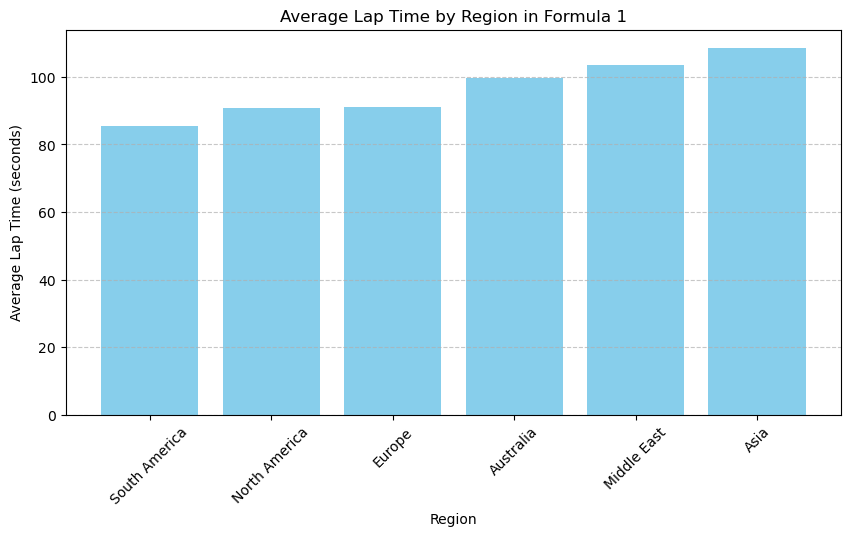

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

lap_times = pd.read_csv("cleaned_lap_times.csv")
races = pd.read_csv("cleaned_races.csv")
circuits = pd.read_csv("cleaned_circuits.csv")

lap_race_df = lap_times.merge(races[['raceId', 'circuitId']], on='raceId', how='left')
lap_race_circuit_df = lap_race_df.merge(circuits[['circuitId', 'circuit_name', 'circuit_country']], on='circuitId', how='left')

lap_race_circuit_df['lap_time_seconds'] = pd.to_timedelta(lap_race_circuit_df['lap_time']).dt.total_seconds()

region_mapping = {
    "Australia": "Australia", "Malaysia": "Asia", "Bahrain": "Middle East", "Spain": "Europe",
    "Turkey": "Europe", "United Kingdom": "Europe", "Germany": "Europe", "Italy": "Europe",
    "Monaco": "Europe", "Canada": "North America", "USA": "North America", "Brazil": "South America",
    "Japan": "Asia", "Singapore": "Asia", "China": "Asia", "Russia": "Europe", "Mexico": "North America",
    "UAE": "Middle East", "France": "Europe", "Saudi Arabia": "Middle East", "Netherlands": "Europe",
    "Argentina": "South America", "South Africa": "Africa", "India": "Asia"
}

lap_race_circuit_df['region'] = lap_race_circuit_df['circuit_country'].map(region_mapping)

lap_race_circuit_df = lap_race_circuit_df.dropna(subset=['region'])

region_avg_lap_time = lap_race_circuit_df.groupby('region')['lap_time_seconds'].mean().sort_values()

plt.figure(figsize=(10, 5))
plt.bar(region_avg_lap_time.index, region_avg_lap_time.values, color='skyblue')
plt.xlabel("Region")
plt.ylabel("Average Lap Time (seconds)")
plt.title("Average Lap Time by Region in Formula 1")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
